In [1]:
from __future__ import print_function
import morphs
from morphs.data import xcor

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sp

/usr/local/anaconda/envs/morphs36/lib/python3.6/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/usr/local/anaconda/envs/morphs36/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
pair_df = morphs.load.pop_pair_df()

In [3]:
morphs.data.parse.morph_dim(pair_df)

In [4]:
def morph_xcor_viz(pair_df, row_order="abcdef", col_order="cdefgh", **kwargs):
    g = morphs.plot.morph_grid(
        pair_df,
        _morph_xcor_viz,
        "Morph Position",
        sub_title="",
        sharex=False,
        sharey=False,
        row_order=row_order,
        col_order=col_order,
        **kwargs
    )
    morph_dims = pair_df["morph_dim"].unique()
    g.set(yticks=[])
    morphs.plot.format_morph_dim_label(g, row_order, col_order, morph_dims)
    morphs.plot.format_morph_dim_label(
        g, row_order, col_order, morph_dims, x_axis=False, flip=True
    )
    return g


def _morph_xcor_viz(**kwargs):
    data = kwargs.pop("data")
    xyz = xcor.df_to_xyz_sf(data)
    interpolated_grid = xcor.interpolate_grid(xyz)
    ax = plt.gca()
    ax.imshow(-interpolated_grid, extent=(1, 128, 1, 128))

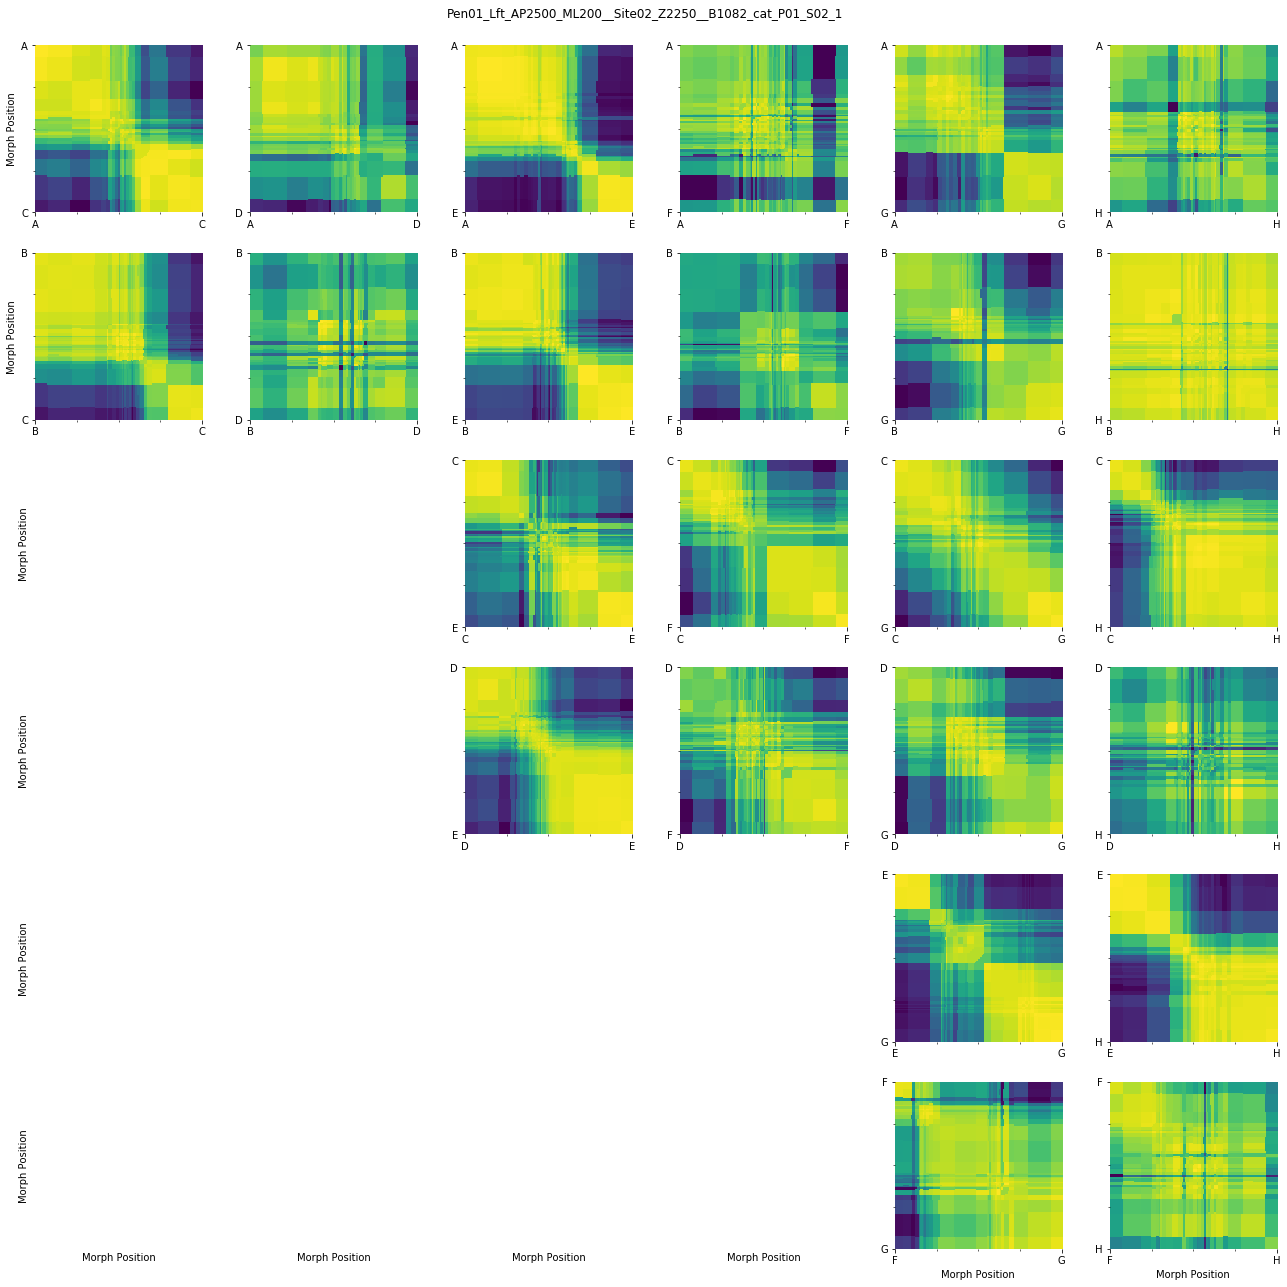

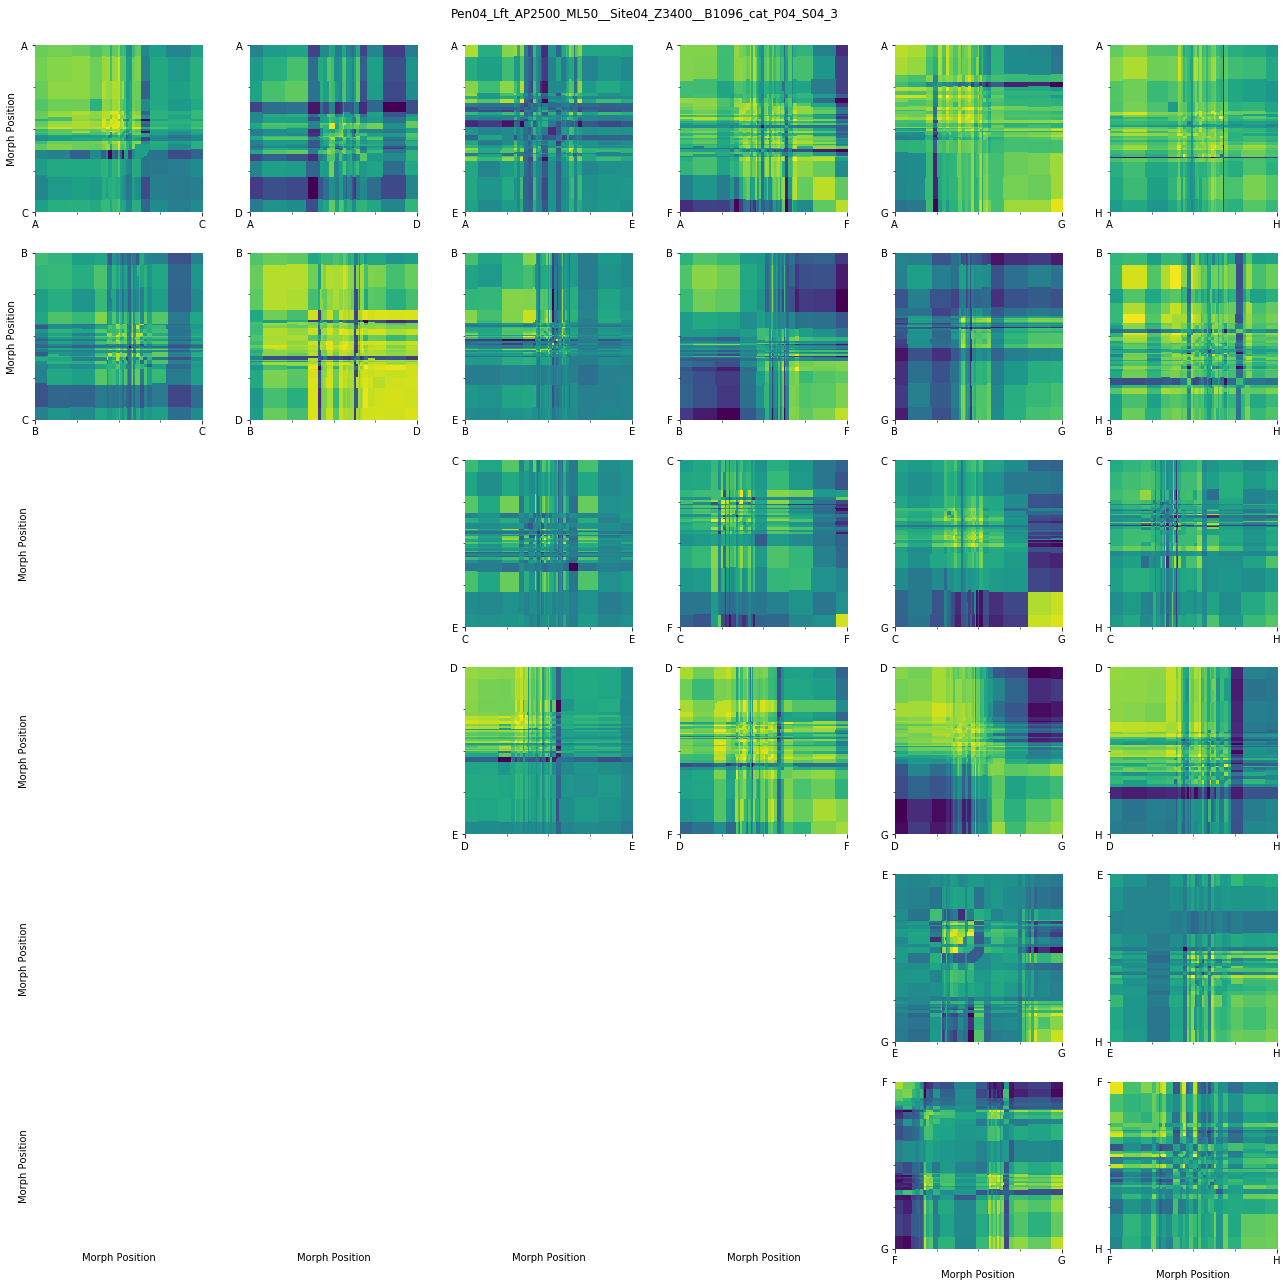

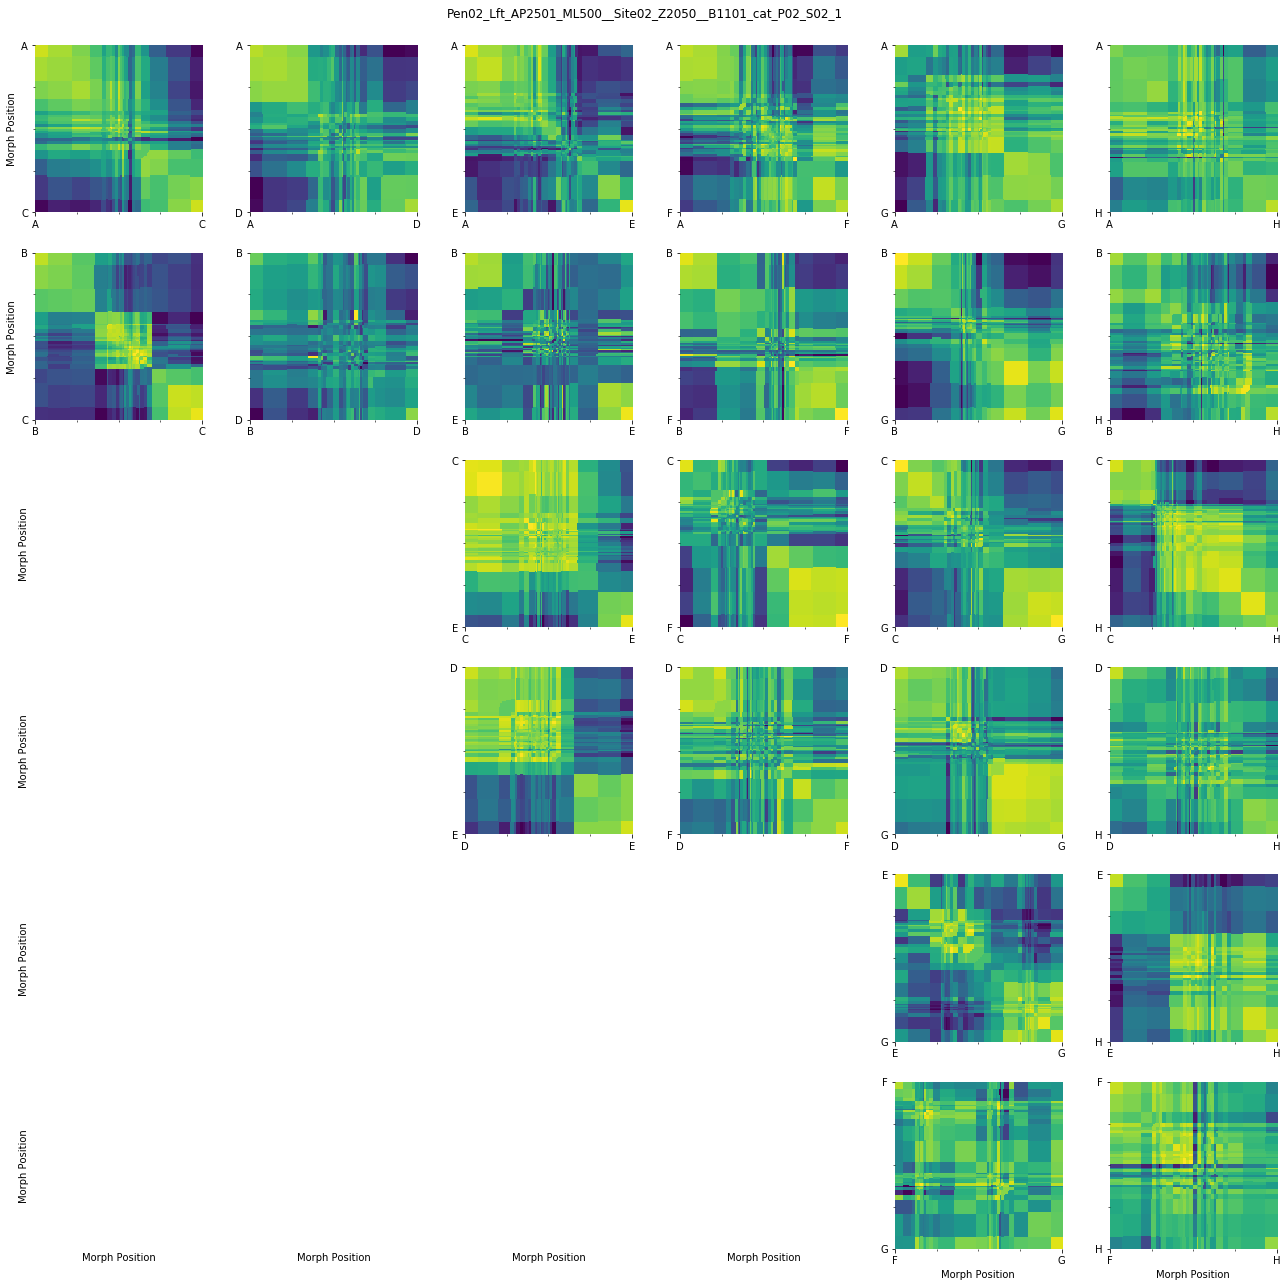

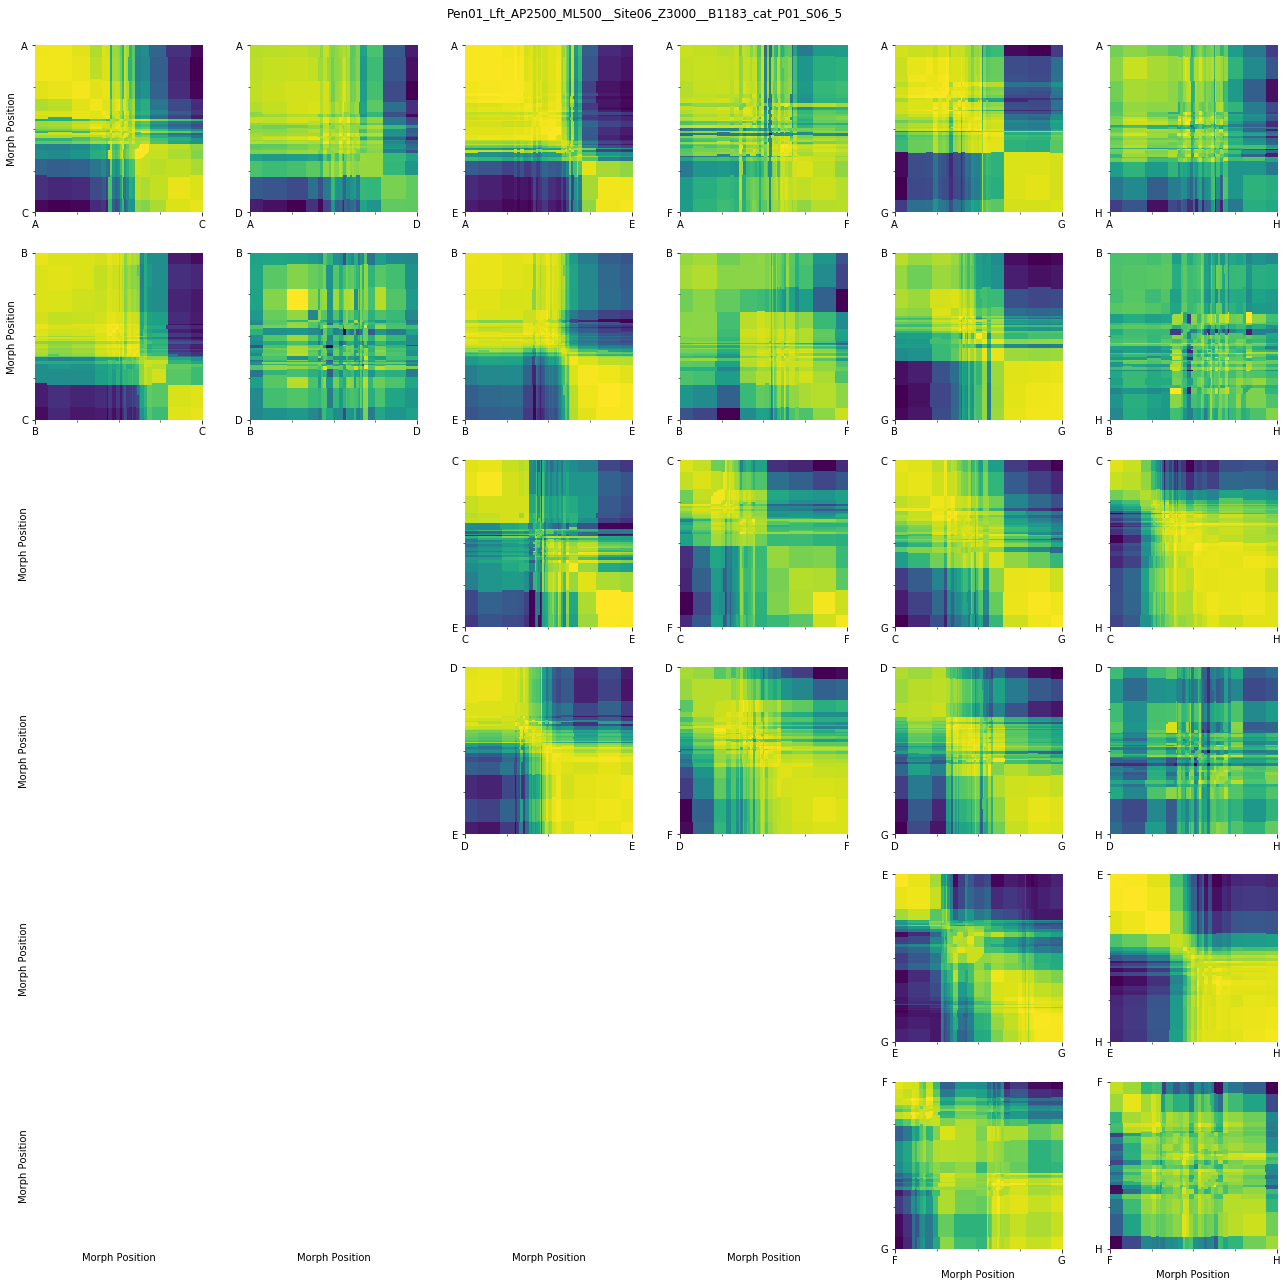

In [5]:
for i, (block_path, block_group) in enumerate(pair_df.groupby("block_path")):
    if i % 10 == 0:
        g = morph_xcor_viz(block_group, title=morphs.data.parse.blockpath_name(block_path))

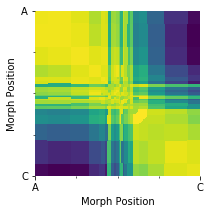

In [6]:
for selected_block_path in pair_df["block_path"].unique():
    if "Pen01_Lft_AP2500_ML500__Site06_Z3000__B1183_cat_P01_S06_5" in selected_block_path:
        break
block_group = pair_df.groupby("block_path").get_group(selected_block_path)
g = morph_xcor_viz(block_group, row_order=["a"], col_order=["c"])
morphs.plot.savefig(g, 'xcor_block_ac')

In [7]:
equal_spacing = morphs.data.parse.equal_spacing(pair_df)

In [8]:
for block_path, block_group in pair_df.groupby("block_path"):
    pair_df.loc[block_group.index, "equal_spacing"] = equal_spacing[block_path]

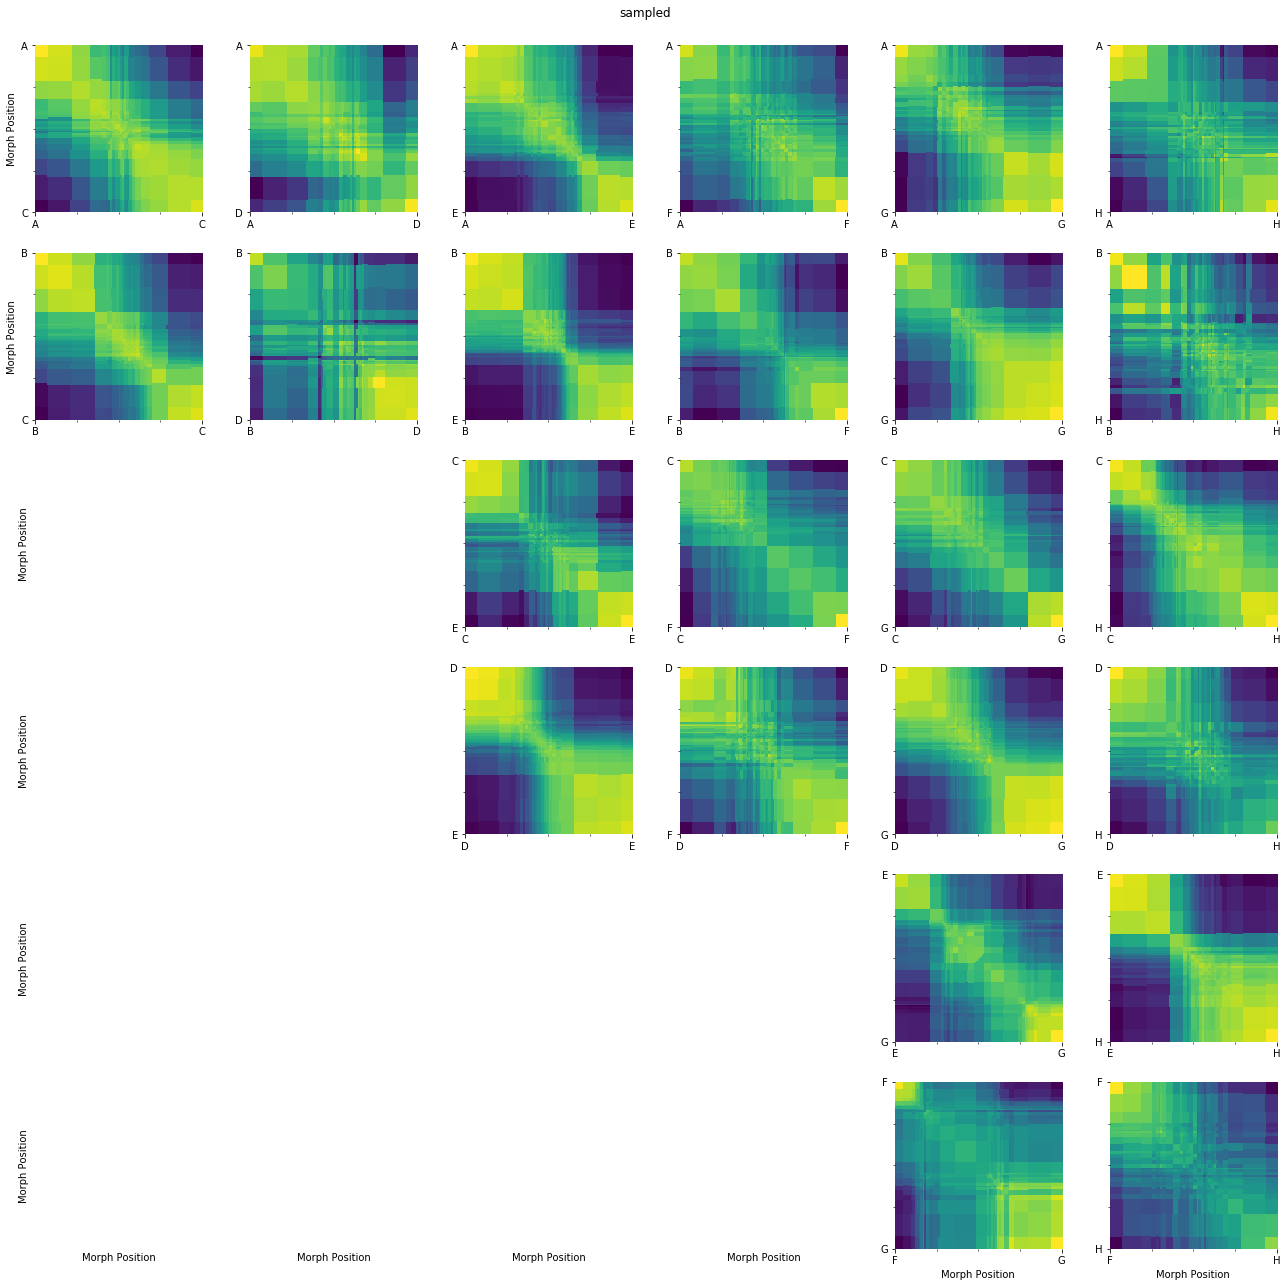

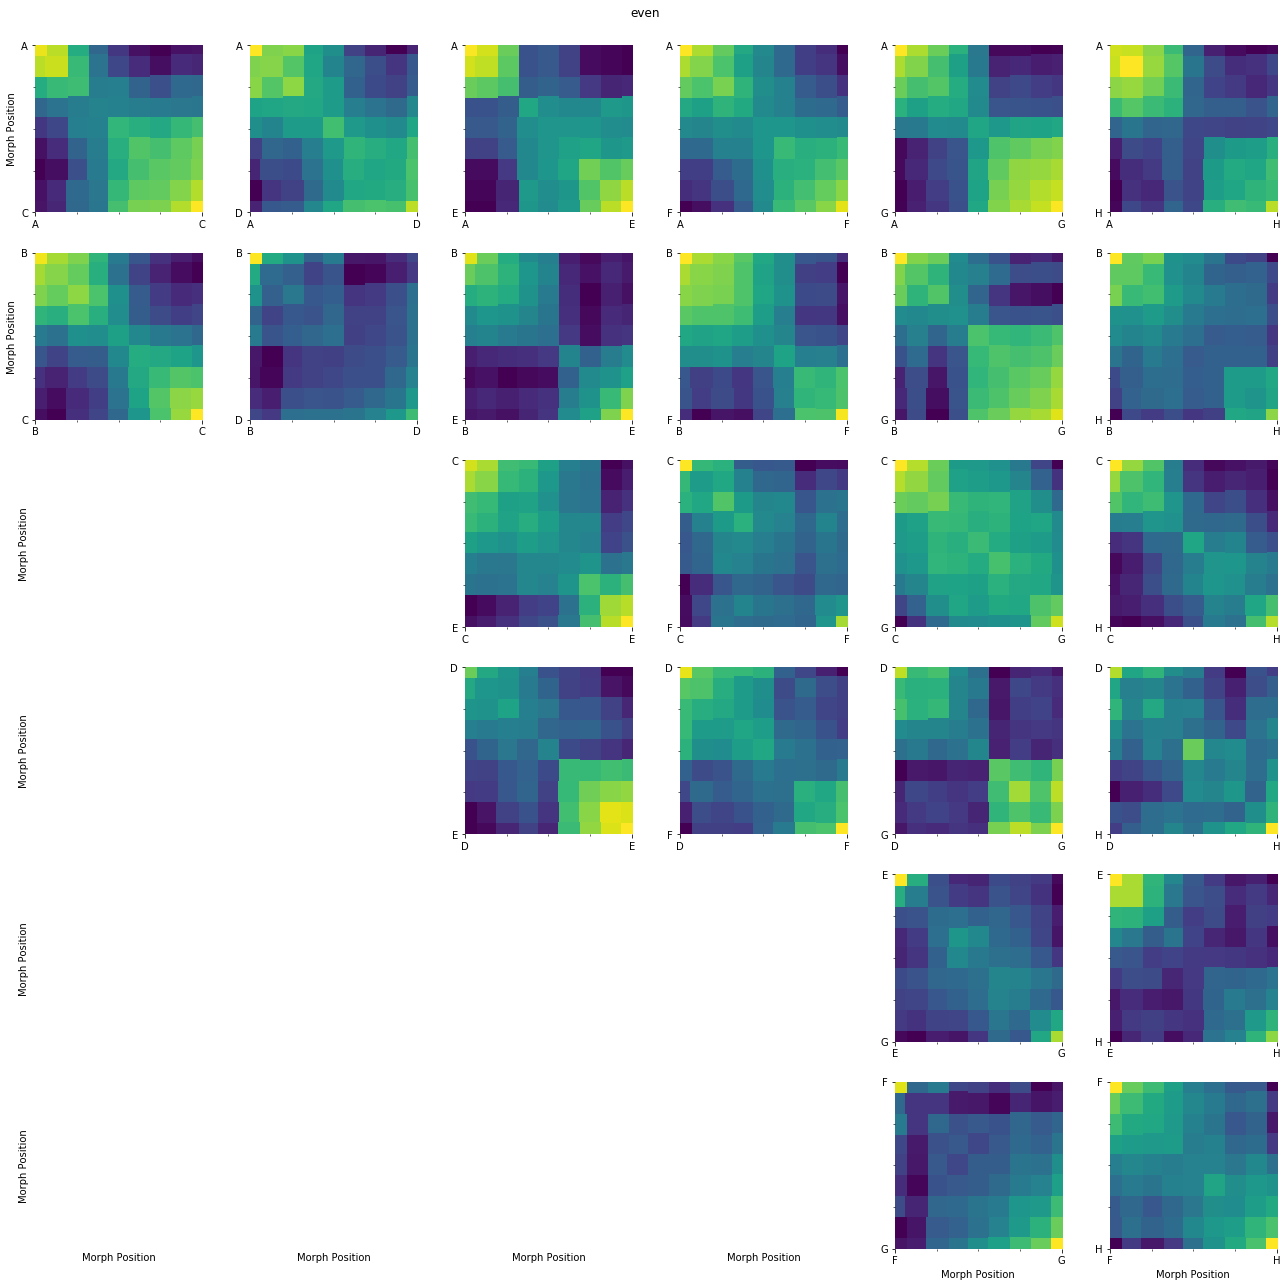

In [9]:
for equal_spacing, group in pair_df.groupby("equal_spacing"):
    g = morph_xcor_viz(group, title="even" if equal_spacing else "sampled")

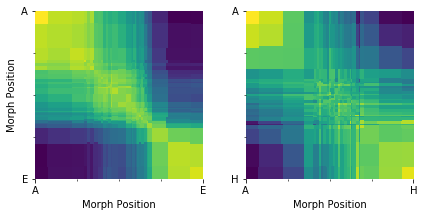

In [10]:
group = pair_df.groupby("equal_spacing").get_group(False)
g = morph_xcor_viz(group, row_order=["a"], col_order=["e", "h"])
morphs.plot.savefig(g, 'xcor_all_sampled_ae_ah')